#### Gede Indra Adi Brata -  225150200111006

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(threshold=np.inf)

In [2]:
def lvq_fit(train, target, lrate, b, max_epoch):
  label, train_idx = np.unique(target, return_index=True)
  weight = train[train_idx].astype(np.float64)
  train = np.delete(train, train_idx, axis=0)
  target = np.delete(target, train_idx, axis=0)
  epoch = 0

  while epoch < max_epoch:
    for i, x in enumerate(train):
      distance = [sum((w - x) ** 2) for w in weight]
      min_idx = np.argmin(distance)
      sign = 1 if target[i] == label[min_idx] else -1
      weight[min_idx] += sign * lrate * (x - weight[min_idx])
    lrate *= b
    epoch += 1

  return weight, label

In [3]:
def lvq_predict(X, model):
  center, label = model
  Y = []
  for x in X:
    d = [sum((c - x) ** 2) for c in center]
    Y.append(label[np.argmin(d)])
  return Y

In [4]:
def calc_accuracy(a, b):
  s = [1 if a[i] == b[i] else 0 for i in range(len(a))]
  return sum(s) / len(a)

Accuracy: 1.0


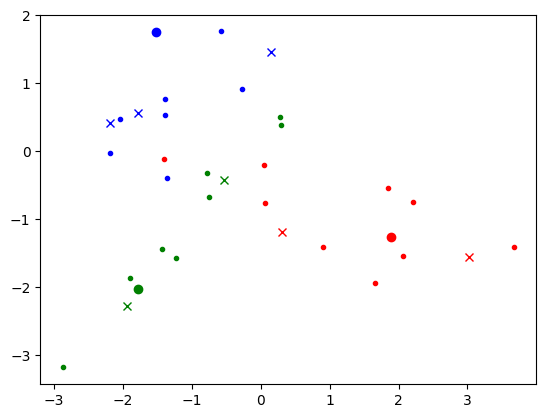

In [5]:
from random import uniform
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs, make_classification

X, y = make_classification(n_samples=31, n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = lvq_fit(X_train, y_train, lrate=.5, b=.8, max_epoch=50)
output = lvq_predict(X_test, model)
accuracy = calc_accuracy(output, y_test)
colors = 'rgbcmyk'

print('Accuracy:', accuracy)
for x, label in zip(X_train, y_train):
  plt.plot(x[0], x[1], colors[label] + '.')
for center, label in zip(model[0], model[1]):
  plt.plot(center[0], center[1], colors[label] + 'o')
for x, label in zip(X_test, output):
  plt.plot(x[0], x[1], colors[label] + 'x')

In [6]:
data = pd.read_csv('data.csv')
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data['label'].unique

<bound method Series.unique of 0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Name: label, Length: 10000, dtype: int64>

In [8]:
# Hapus semua kelas, kecuali kelas 1 dan 2, simpan ke variabel data_lite
data_lite = data[data['label'].isin([1, 2])]


data_lite.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


    label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0       2    0    0    0    0    0    0    0    0    0  ...      0      0   
1       1    0    0    0    0    0    0    0    0    0  ...      0      0   
2       1    0    0    0    0    0    0    0    0    0  ...      0      0   
3       1    0    0    0    0    0    0    0    0    0  ...      0      0   
4       1    0    0    0    0    0    0    0    0    0  ...      0      0   
5       1    0    0    0    0    0    0    0    0    0  ...      0      0   
6       2    0    0    0    0    0    0    0    0    0  ...      0      0   
7       1    0    0    0    0    0    0    0    0    0  ...      0      0   
8       2    0    0    0    0    0    0    0    0    0  ...      0      0   
9       1    0    0    0    0    0    0    0    0    0  ...      0      0   
10      1    0    0    0    0    0    0    0    0    0  ...      0      0   
11      2    0    0    0    0    0    0    0    0    0  ...      0      0   

C:\Users\indra\AppData\Local\Temp\ipykernel_3368\4234468298.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  kelas = row[0]  # Kolom pertama adalah nama kelas


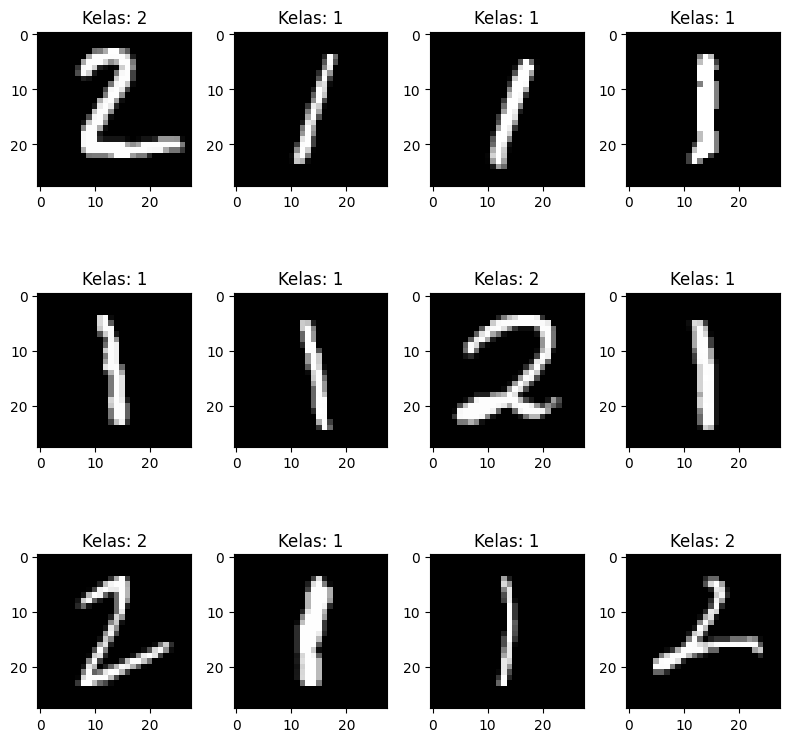

In [ ]:
selected = data_lite.iloc[:12].reset_index(drop=True)

baris, kolom = 3, 4  # Adjusted to fit 12 images
fig, axes = plt.subplots(baris, kolom, figsize=(8, 8))  # Adjusted figsize for better visualization

for index, row in selected.iterrows():
    print(index)
    kelas = row[0]  # Kolom pertama adalah nama kelas
    nilai_piksel = row[1:].values.astype(int)  # Kolom 2 dan seterusnya adalah nilai piksel

    ukuran_citra = (int(np.sqrt(len(nilai_piksel))), int(np.sqrt(len(nilai_piksel))))
    citra = nilai_piksel.reshape(ukuran_citra)

    baris_subplot = index // kolom
    kolom_subplot = index % kolom
    axes[baris_subplot, kolom_subplot].imshow(citra, cmap='gray')
    axes[baris_subplot, kolom_subplot].set_title(f'Kelas: {kelas}')

plt.tight_layout()
plt.show()

In [13]:
target = data_lite.iloc[:, 0]  # Kolom pertama adalah kolom kelas/target
data = data_lite.iloc[:, 1:]   # Sisanya adalah data


# Konversi data dan target ke dalam array NumPy, simpan ke variabel X dan y
X = np.array(data)
y = np.array(target)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #jangan ubah baris ini

model = lvq_fit(X_train, y_train, lrate=0.1, b=0.8, max_epoch=1000)
output = lvq_predict(X_test, model)
accuracy = calc_accuracy(output, y_test)

print('Accuracy:', accuracy)

Accuracy: 0.9470046082949308


1.  Bagaimana arsitektur LVQ yang dibangun? Jelaskan jumlah input neuron dan output neuronnya!

Learning Vector Quantization (LVQ) adalah jaringan saraf yang bekerja dengan pendekatan supervised untuk klasifikasi. LVQ bekerja dengan memetakan kelas input berdasarkan representasi yang dimiliki oleh vektor bobot (prototypes) di lapisan output.

- Jumlah Input Neuron

Pada arsitektur LVQ ini, jumlah neuron input bergantung pada jumlah fitur dari data yang digunakan. Dalam contoh kode, data yang dihasilkan oleh make_classification memiliki 2 fitur (n_features=2), sehingga jaringan memiliki 2 neuron input.

- Jumlah Output Neuron

Jumlah neuron output pada LVQ bergantung pada jumlah kelas unik yang ingin dipetakan. Di bagian awal fungsi lvq_fit, jumlah kelas unik dihitung dengan menggunakan np.unique(y).shape[0]. Dalam contoh kode, jumlah kelas unik adalah 3, sehingga jaringan memiliki 3 neuron output. Kode ini membuat neuron output sebanyak jumlah kelas unik pada data target. Dalam kasus ini, make_classification menghasilkan data dengan 3 kelas (n_classes=3), sehingga terdapat 3 neuron di lapisan output, masing-masing mewakili satu kelas.

2.  Bagaimana proses pelatihan LVQ agar bisa mencapai akurasi > 0,9? Jelaskan hasil tuning hyperparameternya!

In [17]:
lrates = [0.01, 0.5]
bs = [0.8, 0.99]
max_epoch = [100,1000]
best_accuracy = 0
best_params = {}

for lrate in lrates:
  for b in bs:
    for epoch in max_epoch:
      model = lvq_fit(X_train, y_train, lrate, b, epoch)
      output = lvq_predict(X_test, model)
      accuracy = calc_accuracy(output, y_test)
      if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = {'lrate': lrate, 'b': b, 'max_epoch': epoch}

# Print the best hyperparameters
print('Best Accuracy:', best_accuracy)
print('Best Hyperparameters:', best_params)


Best Accuracy: 0.9470046082949308
Best Hyperparameters: {'lrate': 0.01, 'b': 0.8, 'max_epoch': 100}


Kode di atas melakukan tuning hyperparameter pada model Learning Vector Quantization (LVQ) untuk mencapai akurasi lebih dari 0,9 pada data uji. Tuning dilakukan pada tiga hyperparameter utama: learning rate (lrate), decay rate (b), dan jumlah epoch (max_epoch). Melalui perulangan, model dilatih menggunakan kombinasi dari dua nilai learning rate (0.01 dan 0.5), dua nilai decay rate (0.8 dan 0.99), serta dua nilai epoch (100 dan 1000). Setiap kali model dilatih, hasil prediksi pada data uji dihitung akurasinya, dan kombinasi parameter terbaik diperbarui jika akurasi yang diperoleh lebih tinggi dari yang sebelumnya. Setelah iterasi selesai, nilai learning rate, decay rate, dan epoch yang memberikan akurasi tertinggi dicatat. Dengan tuning ini, tujuan utamanya adalah menemukan kombinasi parameter optimal yang menghasilkan akurasi lebih besar dari 0,9 pada model LVQ.

Berdasarkan hasil parameter tuning di atas, didapatkan kombinasi parameter terbaik untuk mencapai akurasi > 0,9 pada data uji adalah sebagai berikut:
- Learning rate (lrate) = 0.01
- Decay rate (b) = 0.8
- Jumlah epoch (max_epoch) = 100